# Analyse Face Oil Ingredients
In total 100 oil products analysed that were obtained from a cosmetics webpage.

In [5]:
import pandas as pd

In [6]:
# Convert to dataframe
fileIn = 'face_oils_ingredients.json'
df = pd.read_json(fileIn).transpose().reset_index()
df.head()

,index,ingredients,price,loves-count,rating,reviews,bestselling
0,100% Organic Cold-Pressed Rose Hip Seed Oil,[Rosa Canina Seed Oil],9.8,225414,4.4086,1564,0.989011
1,Heavenly Sixteen All-In-One Face Oil,"[Meadowfoam, Hemp, Sunflower, Cranberry, Olive...",55.0,33271,4.5815,184,0.978022
2,Superberry Hydrate + Glow Dream Oil,"[Maqui, Prickly Pear, A&#231;ai, Helianthus An...",44.0,95511,4.5273,1026,0.967033
3,Squalane + Vitamin C Rose Firming Oil,"[Advanced Vitamin C , Sugarcane-Derived Squala...",72.0,156288,4.3699,1430,0.956044
4,C.E.O Glow Vitamin C + Turmeric Face Oil,"[Rubus Idaeus Seed Oil, Neopentyl Glycol Dieth...",80.0,60334,4.0961,812,0.945055


In [7]:
# Extended ingredients as new dataframe entries
dfe = df.explode('ingredients')
dfe.head()

,index,ingredients,price,loves-count,rating,reviews,bestselling
0,100% Organic Cold-Pressed Rose Hip Seed Oil,Rosa Canina Seed Oil,9.8,225414,4.4086,1564,0.989011
1,Heavenly Sixteen All-In-One Face Oil,"Meadowfoam, Hemp, Sunflower, Cranberry, Olive,...",55.0,33271,4.5815,184,0.978022
1,Heavenly Sixteen All-In-One Face Oil,Grapeseed Oils,55.0,33271,4.5815,184,0.978022
1,Heavenly Sixteen All-In-One Face Oil,"Blackcurrant, Tsubaki, Sacha Inchi,",55.0,33271,4.5815,184,0.978022
1,Heavenly Sixteen All-In-One Face Oil,Sea Buckthorn Oils,55.0,33271,4.5815,184,0.978022


In [8]:
# Get percentiles
per07, per08, per09 = df['rating'].quantile(q=[0.7, 0.8, 0.9])
# Get corresponding indexes
in07 = df[df['rating'] >= per07].index
in08 = df[df['rating'] >= per08].index
in09 = df[df['rating'] >= per09].index
# Extract all entries with individual ingredients
dfe07 = dfe.loc[in07]
dfe08 = dfe.loc[in08]
dfe09 = dfe.loc[in09]

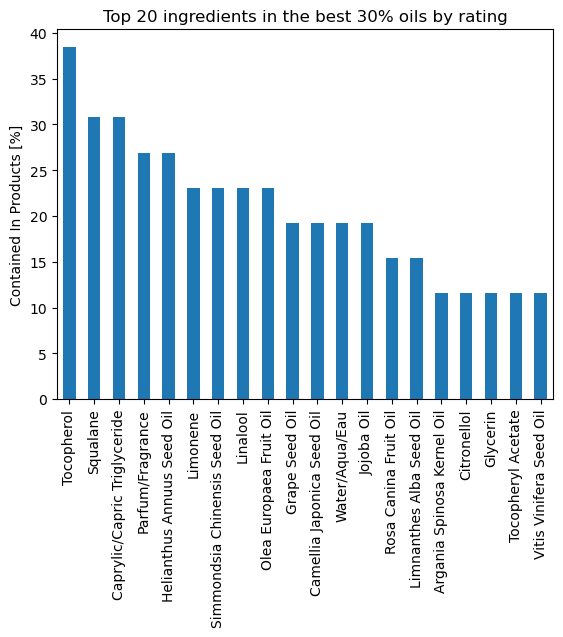

In [9]:
# Top 20 ingredients in the best 30% oils by rating
dfe07['ingredients'].value_counts()[0:20].apply(lambda x: 100*x/len(in07)).plot(
    kind='bar', ylabel='Contained In Products [%]',
    title='Top 20 ingredients in the best 30% oils by rating');

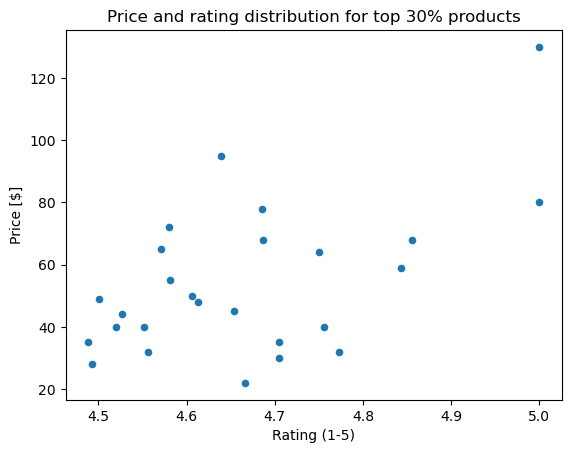

In [10]:
# Price and rating distribution for top 30% products
df.loc[in07].plot.scatter(
    x='rating', y='price', xlabel='Rating (1-5)', ylabel='Price [$]',
    title='Price and rating distribution for top 30% products');

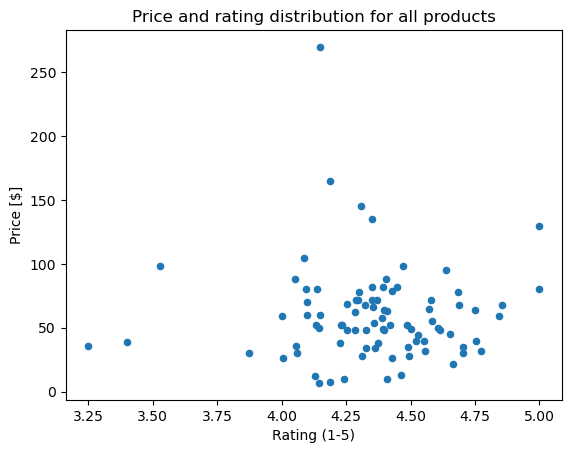

In [11]:
# Price and rating distribution for all products
df.plot.scatter(
    x='rating', y='price', xlabel='Rating (1-5)', ylabel='Price [$]',
    title='Price and rating distribution for all products');

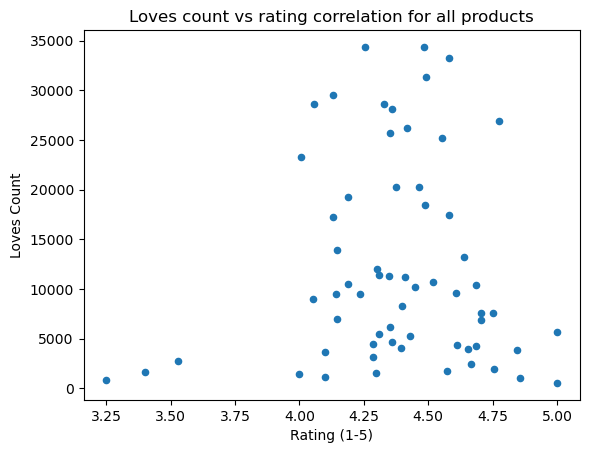

In [12]:
# Loves count vs rating correlation for all products
df[df['loves-count'] < 35000].plot.scatter(
    x='rating', y='loves-count', xlabel='Rating (1-5)', ylabel='Loves Count',
    title='Loves count vs rating correlation for all products');